# Machine Learning Models

Logistic Regression, Random Forest, XGBoost, other tree based models, Naive Bayes

In [1]:
#Import packages and set formatting options
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read CSV File

In [2]:
df = pd.read_csv('feature_selected_train.csv')
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,Higher education,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,Secondary / secondary special,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,Secondary / secondary special,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,Secondary / secondary special,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,Secondary / secondary special,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0


In [3]:
df.shape

(80603, 23)

### Categorical Variable Encoding
After examining the cleaned and reduced training set, there are still two categorical variables that will need to be encoded before applying any machine learning models. Let's examine those first.

In [4]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    54306
Higher education                 22086
Incomplete higher                 3530
Lower secondary                    633
Academic degree                     48
Name: NAME_EDUCATION_TYPE, dtype: int64

Since there are only 5 categories present for education type, we can use One Hot Encoding with k-1 dummies created out of k categories. Before we proceed, let's examine the other categorical variable.

In [5]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 18363
Others                   13289
Sales staff              10219
Core staff                8379
Managers                  6415
Drivers                   5964
High skill tech staff     3966
Accountants               3263
Medicine staff            2463
Security staff            1981
Cooking staff             1718
Cleaning staff            1456
Private service staff      917
Low-skill Laborers         644
Secretaries                471
Waiters/barmen staff       406
Realty agents              280
HR staff                   209
IT staff                   200
Name: OCCUPATION_TYPE, dtype: int64

Since there is no clear ordinal positioning between different occupations, we can use One Hot Encoding for occupation type as well. We will use the pandas function get_dummies() to encode both categorical variables at the same time.

In [6]:
df = pd.get_dummies(df, columns = ['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE'], drop_first = True)

In [7]:
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NONLIVINGAREA_MODE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Others,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,0.0000,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,0.0000,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,0.1060,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,0.0000,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,0.0045,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(80603, 43)

Both features OCCUPATION_TYPE and NAME_EDUCATION_TYPE have been encoded. The dataset is ready for modeling. The dataset has 

## Applying Machine Learning Models

Let's start with splitting the dataframe into independent and dependent variables. The independent variable (y) will be the target variable and the dependent variables (X) will consist of all the remaining predictor variables.

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

X = df[df.columns[~df.columns.isin(['TARGET'])]].copy()
y = df['TARGET'].copy()

Next, we will split the data into a training and testing set, using a 70/30 split.

In [11]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Logistic Regression

In [13]:
#Baseline Logistic regression model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score

y_pred = logreg.predict(X_test)
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.76      1.00      0.87     18459
          1       0.00      0.00      0.00      5722

avg / total       0.58      0.76      0.66     24181

Accuracy score: 0.7633679335015094

Confusion matrix: 
 [[18459     0]
 [ 5722     0]]


C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The baseline logistic regression model was unsuccessful in predicting any defaulters in the test dataset. The accuracy score of 0.76 only reflects the values where Target = 0. Let's see if we can produce better results with parameter tuning.

In [16]:
#Try log reg with different values for c

def reg_param_c(X,y, c_values, test_size):
    c_scores = {}
    for i in c_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
        logreg = LogisticRegression(C = i)
        logreg.fit(X_train, y_train)
        c_scores[i] = accuracy_score(y_test, logreg.predict(X_test))
    return c_scores

reg_param_c(X,y, [0.001, 0.1, 1, 10, 100], 0.3)

{0.001: 0.7614242587155204,
 0.1: 0.7614242587155204,
 1: 0.7614242587155204,
 10: 0.7614242587155204,
 100: 0.7614242587155204}

In [20]:
logreg.predict_proba(X_test)[:20]

array([[0.75829097, 0.24170903],
       [0.88885379, 0.11114621],
       [0.76052382, 0.23947618],
       [0.77447801, 0.22552199],
       [0.64698282, 0.35301718],
       [0.66081333, 0.33918667],
       [0.88404333, 0.11595667],
       [0.78106972, 0.21893028],
       [0.74111827, 0.25888173],
       [0.78289787, 0.21710213],
       [0.68956865, 0.31043135],
       [0.78145327, 0.21854673],
       [0.79095803, 0.20904197],
       [0.80610219, 0.19389781],
       [0.73928875, 0.26071125],
       [0.6736156 , 0.3263844 ],
       [0.72177991, 0.27822009],
       [0.87226785, 0.12773215],
       [0.67326536, 0.32673464],
       [0.7468995 , 0.2531005 ]])

Despite tuning parameters, the probability of predicting a default (Target = 1) is relatively low and we would have to change our threshold significantly from the default of 0.5 to get any predictions for the majority class.

### Random Forest Classifier
We will use random forest, which combines many decision trees to try to accomplish better overall model performance. Let's start with the default parameters.

In [25]:
#import RandomForestClassifier and set random_state for duplicating results

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Feature Importance for out of the box model.

In [26]:
for feature, importance in zip(X_train.columns, pd.Series(classifier.feature_importances_).sort_values(ascending = False)):
    print('Feature',feature, 'Importance', importance)

Feature AMT_INCOME_TOTAL Importance 0.15120192088977052
Feature APARTMENTS_MODE Importance 0.12180508241693673
Feature BASEMENTAREA_AVG Importance 0.10645504508112003
Feature ENTRANCES_AVG Importance 0.09382327229936242
Feature EXT_SOURCE_1 Importance 0.0828751650045905
Feature EXT_SOURCE_2 Importance 0.06328979783547661
Feature EXT_SOURCE_3 Importance 0.04544765949827793
Feature FLOORSMAX_MODE Importance 0.04206080753518144
Feature LANDAREA_AVG Importance 0.036736346091766355
Feature LIVE_CITY_NOT_WORK_CITY Importance 0.03547126002978609
Feature NONLIVINGAREA_MODE Importance 0.031779991385613174
Feature REGION_POPULATION_RELATIVE Importance 0.027379857891961096
Feature REGION_RATING_CLIENT Importance 0.026457962924412437
Feature REG_CITY_NOT_LIVE_CITY Importance 0.024752886172016392
Feature TOTALAREA_MODE Importance 0.024437177301917176
Feature YEARS_BEGINEXPLUATATION_MODE Importance 0.020446017048314048
Feature YEARS_BIRTH Importance 0.018849219796352838
Feature YEARS_BUILD_MODE Impo

In [27]:
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     18459
          1       0.96      0.67      0.79      5722

avg / total       0.92      0.92      0.91     24181

Accuracy score: 0.9159670815929862

Confusion matrix: 
 [[18317   142]
 [ 1890  3832]]


The baseline random forest model performed much better than logistic regression, with an accuracy of over 91%. However, since this is a binary imbalanced class problem, accuracy is not the best measure for evaluating performance. We will also calculate the Area under the Curve (AUC) and plot the Receiving Operating Characteristic (ROC) curve.

In [28]:
roc_auc_score(y_test, y_pred)

0.8310015930522615

The baseline Random Forest Classifier model yielded an Area Under Curve of 0.831

In [29]:
print(pd.Series(y_pred).value_counts())
print(y_test.value_counts())

0    20207
1     3974
dtype: int64
0    18459
1     5722
Name: TARGET, dtype: int64


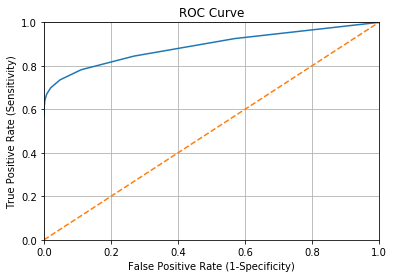

In [31]:
#Same as running roc_auc_score(y_test, y_pred) above

prob_def = classifier.predict_proba(X_test)[:,1]
fp_rate, tp_rate, thresholds = roc_curve(y_test, prob_def)
roc_auc = auc(fp_rate, tp_rate)
plt.plot(fp_rate, tp_rate)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

### Hyperparameter Tuning
Baseline predictive power is decent but let us see if we can do better with hyperparameter tuning. Let's start by finding the optimal number of estimators. We will try to compare performance tradeoff versus incremental improvements.

In [32]:
#Find optimal estimators n

for i in range(10,160,10):
    class2 = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 42)
    class2.fit(X_train, y_train)
    y_pred = class2.predict(X_test)
    print('AUC score for', i, 'estimators is:', roc_auc_score(y_test, y_pred))

AUC score for 10 estimators is: 0.8310015930522615
AUC score for 20 estimators is: 0.8321270077583356
AUC score for 30 estimators is: 0.8377316996722608
AUC score for 40 estimators is: 0.8359805417407774
AUC score for 50 estimators is: 0.8347301062034209
AUC score for 60 estimators is: 0.8353295387215124
AUC score for 70 estimators is: 0.8376346795307563
AUC score for 80 estimators is: 0.8372912722545837
AUC score for 90 estimators is: 0.8373934996249565
AUC score for 100 estimators is: 0.8371523197191566
AUC score for 110 estimators is: 0.8379116709696367
AUC score for 120 estimators is: 0.8379571206099676
AUC score for 130 estimators is: 0.837917791830479
AUC score for 140 estimators is: 0.838131884678475
AUC score for 150 estimators is: 0.8385626739889014


Performance did not significantly improve as the number of estimators increased past a certain point. We will choose 70 estimators.

In [33]:
classifier.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

We will adjust the following hyperparameters:
- bootstrap: method for sampling data points (with or without replacement)
- max_depth: max levels in each decision tree
- max_features: max features considered for splitting a node
- min_samples_leaf: min number of data points allowed in a leaf node
- min_samples_split: min number of data points put in a node before node is split
- n_estimators: number of trees in the forest

Since it will be too computationally expensive to exhaustively try every single parameter combination, we will use RandomizedSearchCV to take a random subset of possible parameter combinations.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

bootstrap = [True, False]
max_depth = [i for i in range(10,100,10)]
max_depth.append(None)
max_features = ['sqrt', 'log2']
min_samples_leaf = [1, 2, 3, 4, 5]
min_samples_split = [i for i in range(2,12,2)]
n_estimators = [i for i in range(10,110,10)]

In [35]:
random_grid = {'bootstrap': bootstrap,
                'max_depth': max_depth,
                'max_features': max_features,
                'min_samples_leaf': min_samples_leaf,
                'min_samples_split': min_samples_split,
                'n_estimators': n_estimators}
random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 3, 4, 5],
 'min_samples_split': [2, 4, 6, 8, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [36]:
rf_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  9.9min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_samples_split': [2, 4, 6, 8, 10], 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [39]:
print('Best Parameters:', rf_cv.best_params_)
print('Best Estimator:', rf_cv.best_estimator_)
print('Best Score:', rf_cv.best_score_)

Best Parameters: {'n_estimators': 90, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Estimator: RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Best Score: 0.9195349331820921


In [38]:
rf_cv.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91468, std: 0.00158, params: {'n_estimators': 10, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': False},
 mean: 0.91454, std: 0.00251, params: {'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True},
 mean: 0.90908, std: 0.00122, params: {'n_estimators': 10, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False},
 mean: 0.91310, std: 0.00265, params: {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False},
 mean: 0.91952, std: 0.00154, params: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False},
 mean: 0.91879, std: 0.00216, params: {'n_estimators': 60, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap':

In [40]:
best_pred = rf_cv.best_estimator_.predict(X_test)

In [41]:
print('AUC for best estimator:',roc_auc_score(y_test, best_pred))

AUC for best estimator: 0.8389034776506399


After hyperparameter tuning, we have an AUC score of 0.8389, which is an improvement over the baseline score of 0.8310.

### XGBoost
Extreme Gradient Boosting

In [43]:
import xgboost as xgb
#data_dm = xgb.DMatrix(data = X_train, label = y_train)

xg_class = xgb.XGBClassifier(random_state = 42)
xg_class.fit(X_train, y_train)
y_pred = xg_class.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
print('\nClassification report: \n',classification_report(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('\nConfusion matrix: \n',confusion_matrix(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

          0       0.92      0.99      0.95     18459
          1       0.95      0.71      0.81      5722

avg / total       0.92      0.92      0.92     24181

Accuracy score: 0.9220048798643563

Confusion matrix: 
 [[18249   210]
 [ 1676  4046]]


In [45]:
roc_auc_score(y_test, y_pred)

0.8478594284519085

Using this boosting technique out of the box yielded an AUC score of 0.8479.

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": [1, 3, 5],
              "min_child_weight" : [1,3],
              "n_estimators": [20],
              "learning_rate": [0.05, 0.1,0.16]}
grid_search = GridSearchCV(estimator = xgb.XGBClassifier(), param_grid = param_grid, cv = 3, verbose = 10, n_jobs = -1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:  2.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 3, 5], 'min_child_weight': [1, 3], 'n_estimators': [20], 'learning_rate': [0.05, 0.1, 0.16]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [49]:
print('Best Parameters:', grid_search.best_params_)
print('Best Estimator:', grid_search.best_estimator_)
print('Best Score:', grid_search.best_score_)

Best Parameters: {'learning_rate': 0.16, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 20}
Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.16, max_delta_step=0,
       max_depth=5, min_child_weight=3, missing=None, n_estimators=20,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Best Score: 0.9202084293360746


In [50]:
grid_search.grid_scores_

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.76057, std: 0.00001, params: {'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.76057, std: 0.00001, params: {'learning_rate': 0.05, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.90117, std: 0.00258, params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.90117, std: 0.00258, params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.90757, std: 0.00217, params: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.90748, std: 0.00194, params: {'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.90840, std: 0.00124, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 20},
 mean: 0.90840, std: 0.00124, params: {'learning_rate': 0.1, 'max_depth': 1, 'min_child_weight': 3, 'n_estimators': 20},
 mean: 0.91656, std: 0.001

In [51]:
best_pred_xgb = grid_search.best_estimator_.predict(X_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
print('\nClassification report: \n',classification_report(y_test, best_pred_xgb))
print('Accuracy score:',accuracy_score(y_test, best_pred_xgb))
print('\nConfusion matrix: \n',confusion_matrix(y_test, best_pred_xgb))


Classification report: 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95     18459
          1       0.97      0.69      0.81      5722

avg / total       0.93      0.92      0.92     24181

Accuracy score: 0.9221702989950787

Confusion matrix: 
 [[18326   133]
 [ 1749  3973]]


In [54]:
print('AUC for best estimator:',roc_auc_score(y_test, best_pred_xgb))

AUC for best estimator: 0.8435662434022754


### AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 42)
ada.fit(X_train, y_train)
ada.score(X_test,y_test)

0.9193168189901162

In [59]:
print('AUC:',roc_auc_score(y_test, ada.predict(X_test)))

AUC: 0.8483296838233118


### LightGBM

In [60]:
import lightgbm as lgb

In [61]:
#use cross val score - might be able to change parameter to precision or recall

lgb = lgb.LGBMClassifier(random_state = 42)
lgb.fit(X_train, y_train)
lgb.score(X_test, y_test)

C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9244448120425127

In [62]:
print('AUC:',roc_auc_score(y_test, lgb.predict(X_test)))

AUC: 0.8491560899800816


C:\Users\Saumit\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [63]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1- fpr[thresholds > threshold][-1])

### Naive Bayes

In [64]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [65]:
bern = BernoulliNB(binarize = 0.1)
bern.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.1, class_prior=None, fit_prior=True)

In [66]:
y_pred = bern.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))

Accuracy score: 0.8477730449526488
AUC: 0.7420182270430936


In [67]:
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [68]:
y_pred = multi.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))

Accuracy score: 0.7390926760679872
AUC: 0.608247253579681


In [69]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)

GaussianNB(priors=None)

In [70]:
y_pred = gauss.predict(X_test)
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('AUC:',roc_auc_score(y_test, y_pred))

Accuracy score: 0.7634919978495514
AUC: 0.5002621461027613
